In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= (20,10)
from countrygroups import EUROPEAN_UNION

In [2]:
def europe(x):
    if x in EUROPEAN_UNION.names:
        return 'Europe'
    else:
        return 'Other'

In [3]:
infl_df = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_2763929.csv', skiprows=4)

In [4]:
infl_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.746949,5.370290,5.250171,6.594604,6.399343,4.720811,3.923372,4.978097,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.481021,1.758565,2.425007,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


In [5]:
infl_df['Continent'] = infl_df['Country Name'].apply(lambda x: europe(x))

In [6]:
infl_df=infl_df[infl_df['Continent']=='Europe']
infl_df.reset_index(inplace=True, drop=True)

In [7]:
infl_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,Continent
0,Austria,AUT,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.945749,3.542240,4.381799,2.708767,3.868564,4.930916,...,2.000156,1.605812,0.896563,0.891592,2.081269,1.998380,1.530896,1.381911,NaN,Europe
1,Belgium,BEL,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.299467,0.992676,1.404607,2.148003,4.168761,4.065201,...,1.113096,0.340003,0.561429,1.973853,2.125971,2.053165,1.436820,0.740792,NaN,Europe
2,Bulgaria,BGR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.890094,-1.418184,-0.104633,-0.798650,2.061596,2.814545,3.103729,1.672441,NaN,Europe
3,Cyprus,CYP,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.827301,-0.615385,0.103199,1.958763,-0.303337,0.202840,...,-0.399358,-1.354989,-2.096998,-1.429167,0.531766,1.435491,0.250371,-0.638423,NaN,Europe
4,Germany,DEU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.536612,2.293676,2.843280,2.966961,2.335728,3.242329,...,1.504721,0.906798,0.514421,0.491749,1.509497,1.732168,1.445667,0.506690,NaN,Europe


In [8]:
infl_tran =infl_df.T

In [9]:
infl_tran.columns = infl_tran.loc['Country Name']

In [10]:
infl_clr = infl_tran.drop(['Country Name','Continent', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis=0)

In [11]:
infl_clr.drop(['Bulgaria',
               'Estonia',
               'Croatia',
               'Hungary',
               'Lithuania',
               'Latvia',
               'Romania',
               'Slovenia',
               'Poland'], axis=1, inplace=True)

In [12]:
infl_clr

Country Name,Austria,Belgium,Cyprus,Germany,Denmark,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Malta,Netherlands,Portugal,Sweden
1960,1.945749,0.299467,0.827301,1.536612,1.25523,1.177758,3.418127,4.139936,1.477834,0.450837,2.350161,0.44962,3.384615,2.323944,3.046593,4.141779
1961,3.54224,0.992676,-0.615385,2.293676,3.451629,0.809255,1.691002,2.400461,2.103562,2.756999,2.050697,0.482434,2.511322,1.307639,1.548997,2.157973
1962,4.381799,1.404607,0.103199,2.84328,7.37782,5.706487,4.383983,5.33128,-0.475436,4.263727,4.691144,0.895947,0.168675,2.431145,2.662064,4.766197
1963,2.708767,2.148003,1.958763,2.966961,6.105033,8.743692,4.996382,4.999153,3.184716,2.453621,7.454718,2.876322,1.876353,3.243659,2.021583,2.87174
1964,3.868564,4.168761,-0.303337,2.335728,3.092784,6.979251,10.275861,3.211192,0.617284,6.71729,5.912323,3.096382,2.180244,5.823766,3.444898,3.387662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.891592,1.973853,-1.429167,0.491749,0.25,-0.202672,0.356685,0.183335,-0.825652,0.008306,-0.094017,0.290833,0.642703,0.316667,0.607397,0.984269
2017,2.081269,2.125971,0.531766,1.509497,1.147132,1.956083,0.754015,1.032283,1.121235,0.340532,1.226533,1.7308,1.364354,1.381459,1.368614,1.794499
2018,1.99838,2.053165,1.435491,1.732168,0.813609,1.675068,1.083821,1.850815,0.625629,0.48837,1.137488,1.528195,1.157824,1.703498,0.993716,1.953535
2019,1.530896,1.43682,0.250371,1.445667,0.758132,0.699536,1.024094,1.108255,0.252978,0.939044,0.611247,1.743321,1.64206,2.633699,0.338178,1.784151


In [13]:
infl_clr.index = pd.to_datetime(infl_clr.index)

In [14]:
infl_clr

Country Name,Austria,Belgium,Cyprus,Germany,Denmark,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Malta,Netherlands,Portugal,Sweden
1960-01-01,1.945749,0.299467,0.827301,1.536612,1.25523,1.177758,3.418127,4.139936,1.477834,0.450837,2.350161,0.44962,3.384615,2.323944,3.046593,4.141779
1961-01-01,3.54224,0.992676,-0.615385,2.293676,3.451629,0.809255,1.691002,2.400461,2.103562,2.756999,2.050697,0.482434,2.511322,1.307639,1.548997,2.157973
1962-01-01,4.381799,1.404607,0.103199,2.84328,7.37782,5.706487,4.383983,5.33128,-0.475436,4.263727,4.691144,0.895947,0.168675,2.431145,2.662064,4.766197
1963-01-01,2.708767,2.148003,1.958763,2.966961,6.105033,8.743692,4.996382,4.999153,3.184716,2.453621,7.454718,2.876322,1.876353,3.243659,2.021583,2.87174
1964-01-01,3.868564,4.168761,-0.303337,2.335728,3.092784,6.979251,10.275861,3.211192,0.617284,6.71729,5.912323,3.096382,2.180244,5.823766,3.444898,3.387662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,0.891592,1.973853,-1.429167,0.491749,0.25,-0.202672,0.356685,0.183335,-0.825652,0.008306,-0.094017,0.290833,0.642703,0.316667,0.607397,0.984269
2017-01-01,2.081269,2.125971,0.531766,1.509497,1.147132,1.956083,0.754015,1.032283,1.121235,0.340532,1.226533,1.7308,1.364354,1.381459,1.368614,1.794499
2018-01-01,1.99838,2.053165,1.435491,1.732168,0.813609,1.675068,1.083821,1.850815,0.625629,0.48837,1.137488,1.528195,1.157824,1.703498,0.993716,1.953535
2019-01-01,1.530896,1.43682,0.250371,1.445667,0.758132,0.699536,1.024094,1.108255,0.252978,0.939044,0.611247,1.743321,1.64206,2.633699,0.338178,1.784151


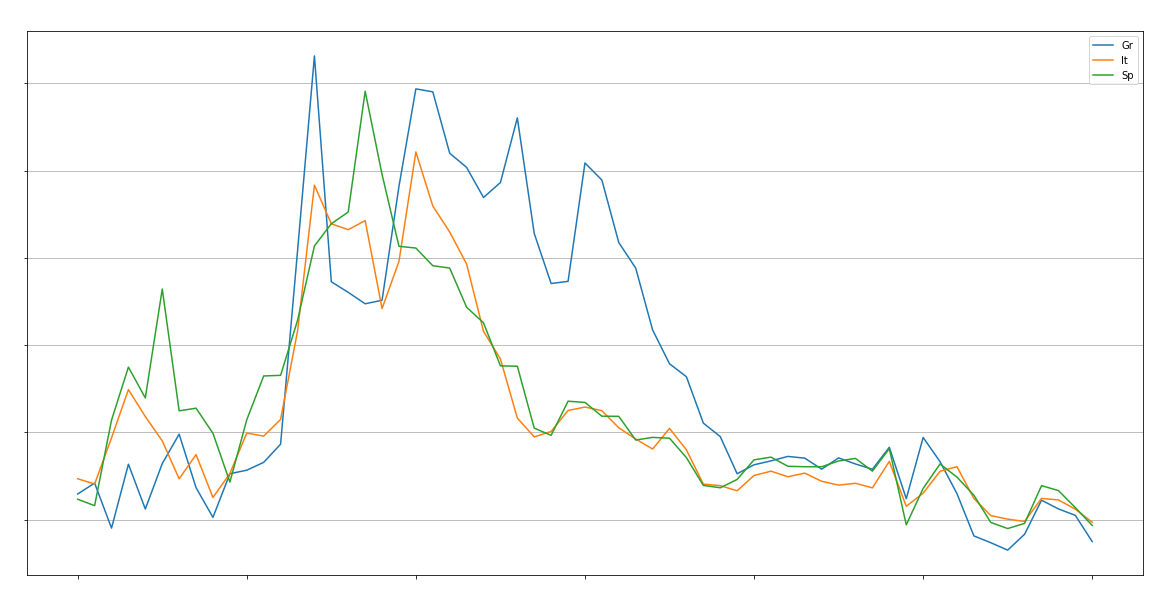

In [15]:
plt.plot(infl_clr['Greece'],label='Gr')
plt.plot(infl_clr['Italy'], label='It')
plt.plot(infl_clr['Spain'], label='Sp')
plt.xticks(color='w', rotation=50, size=10)
plt.yticks(color='w', size=10)
plt.title('Countries Inflations', color='w', size=25)
plt.grid(axis='y')
plt.legend()
plt.show()

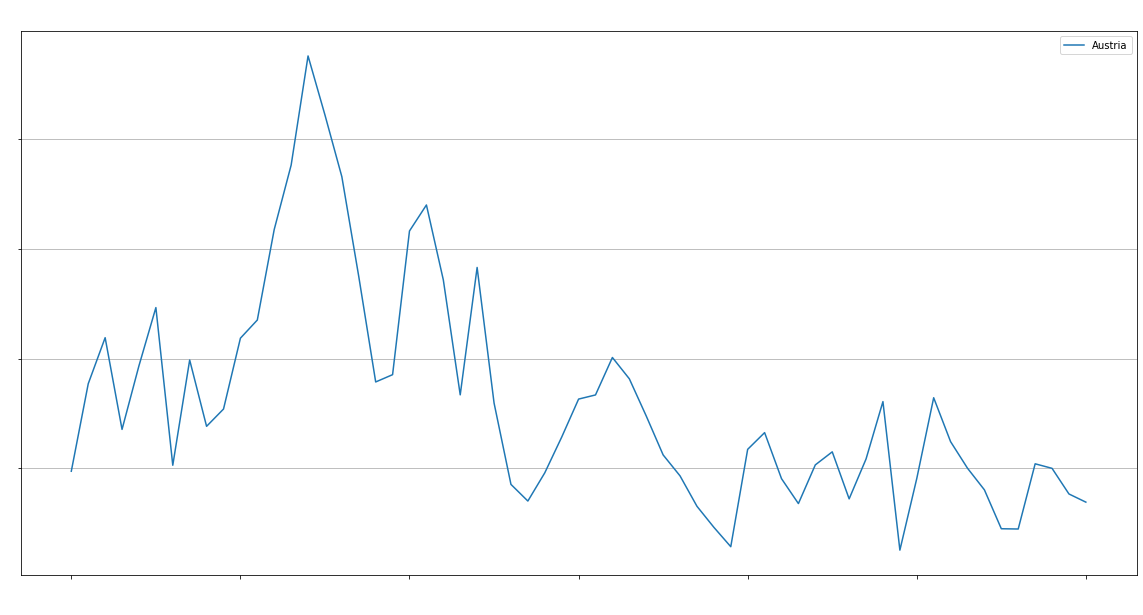

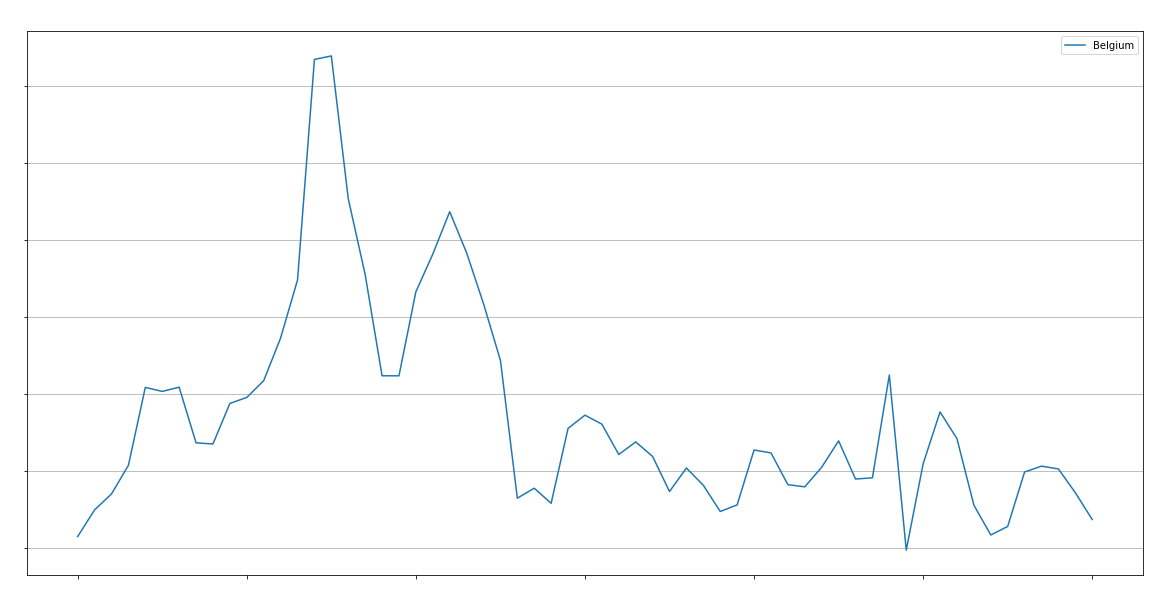

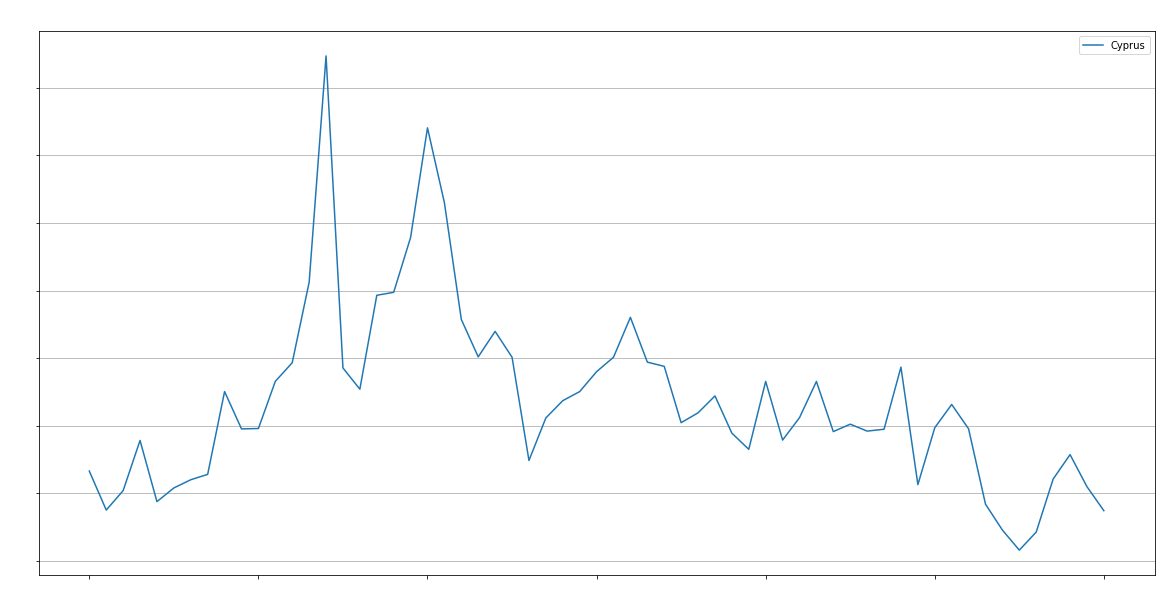

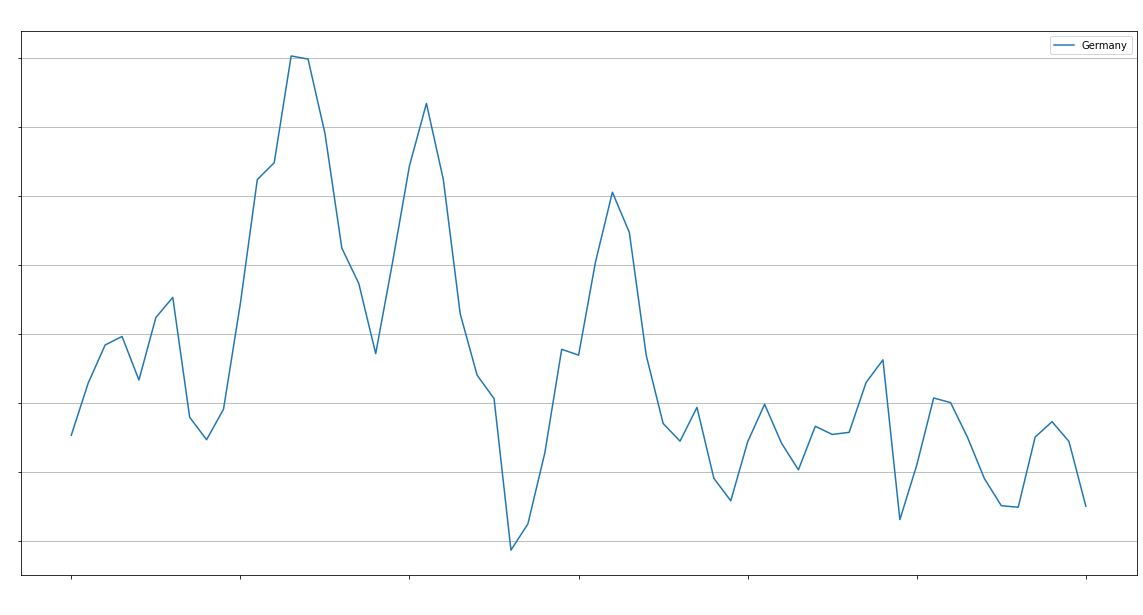

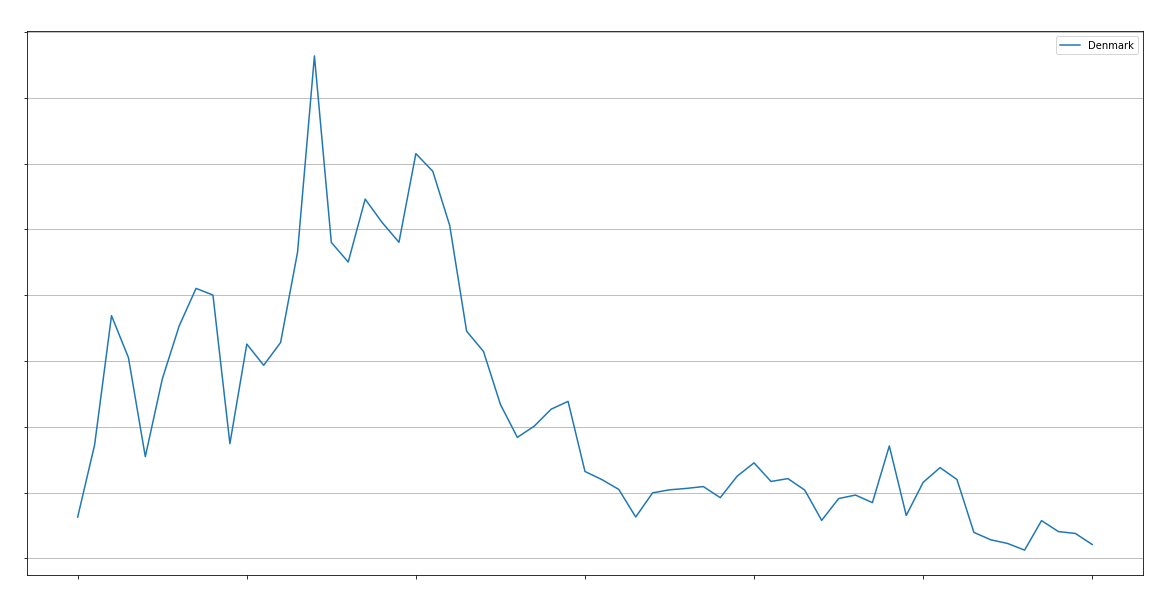

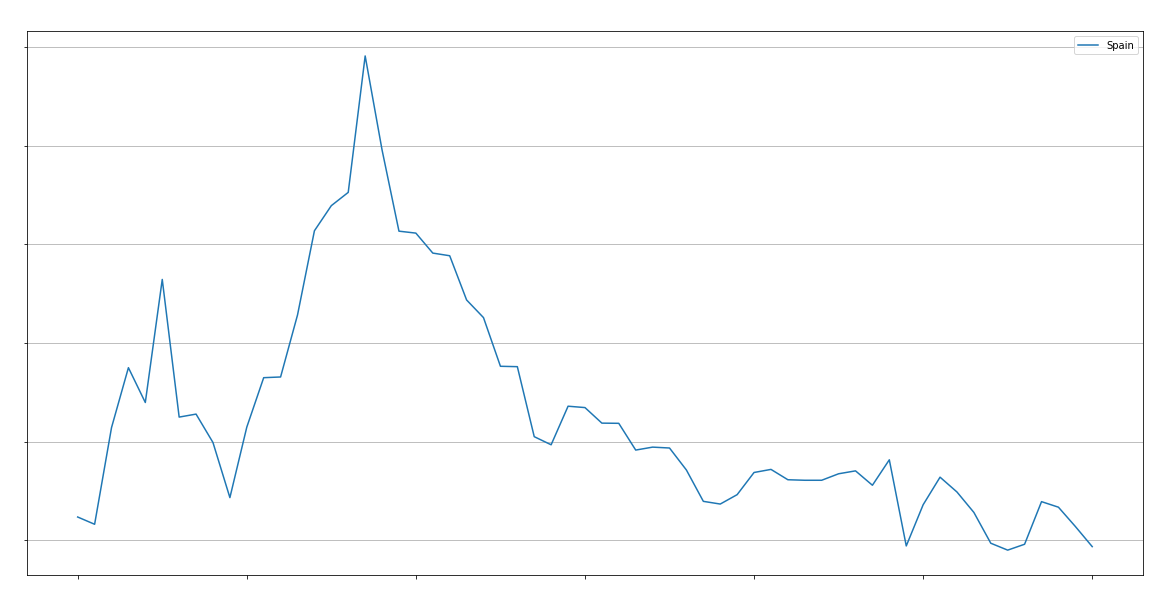

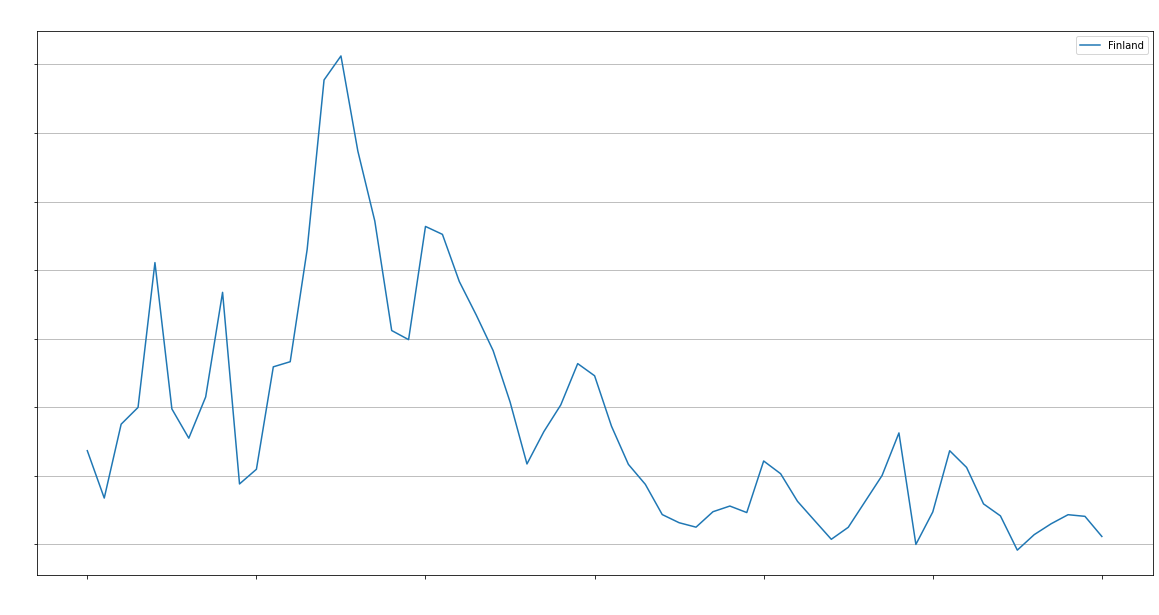

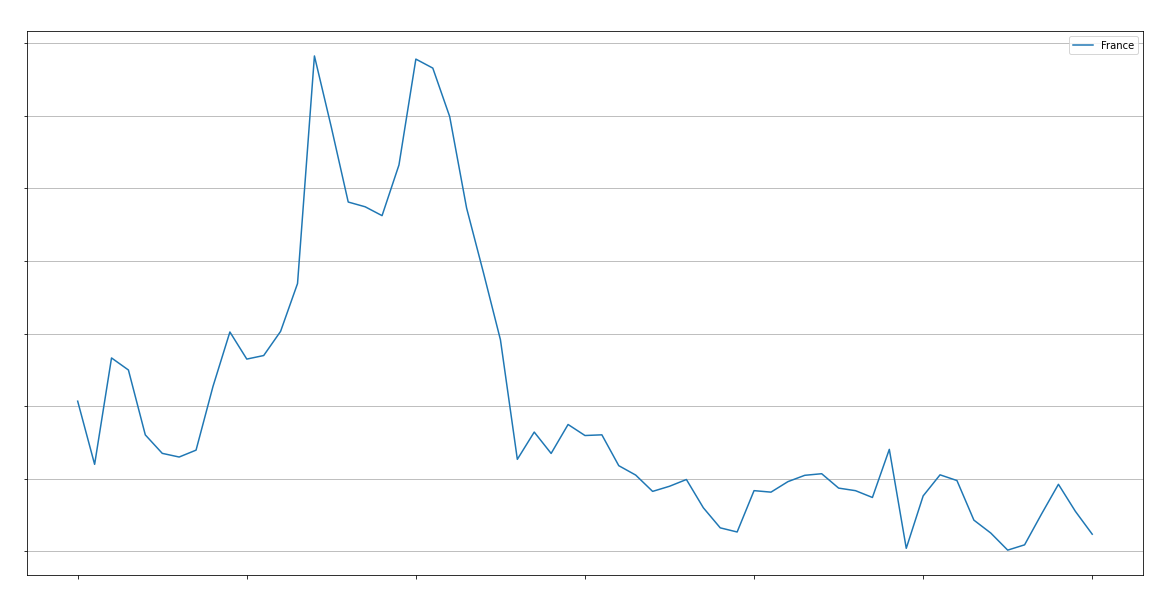

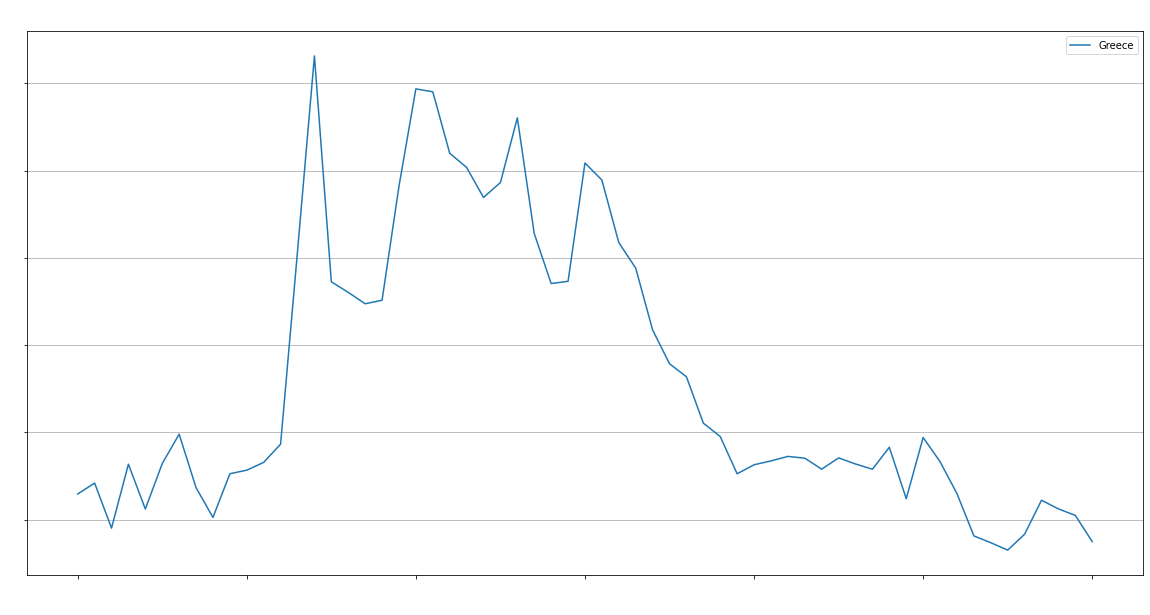

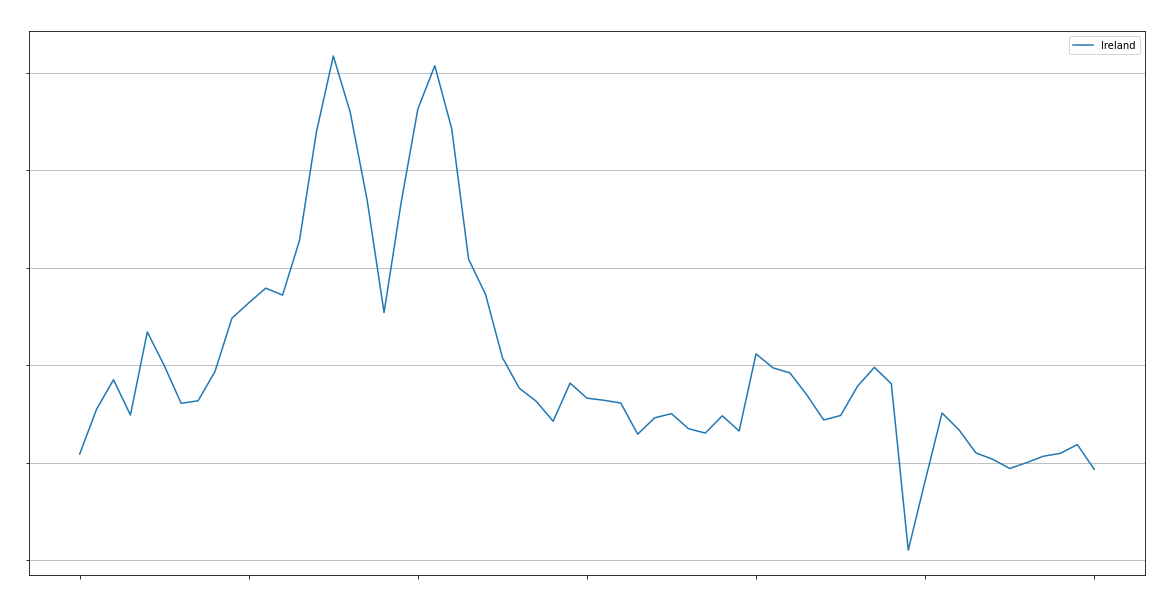

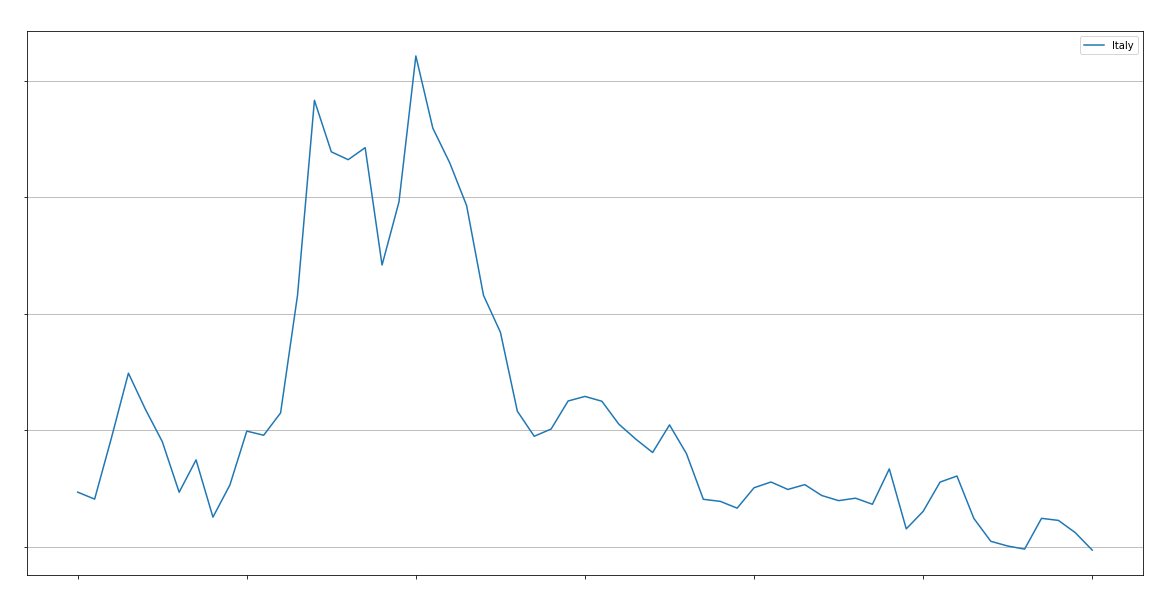

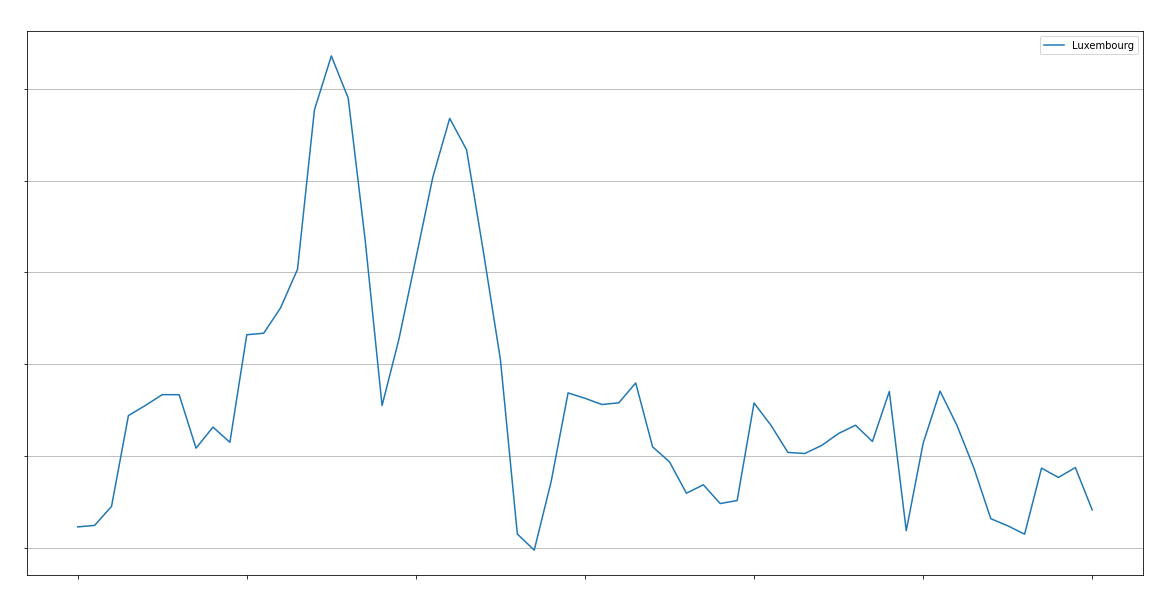

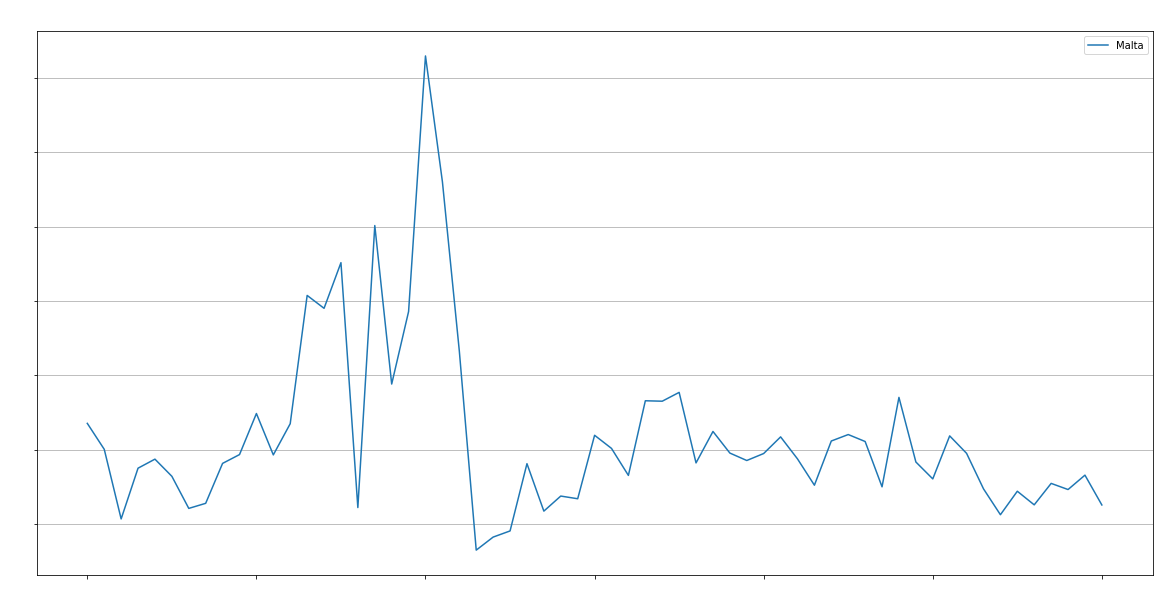

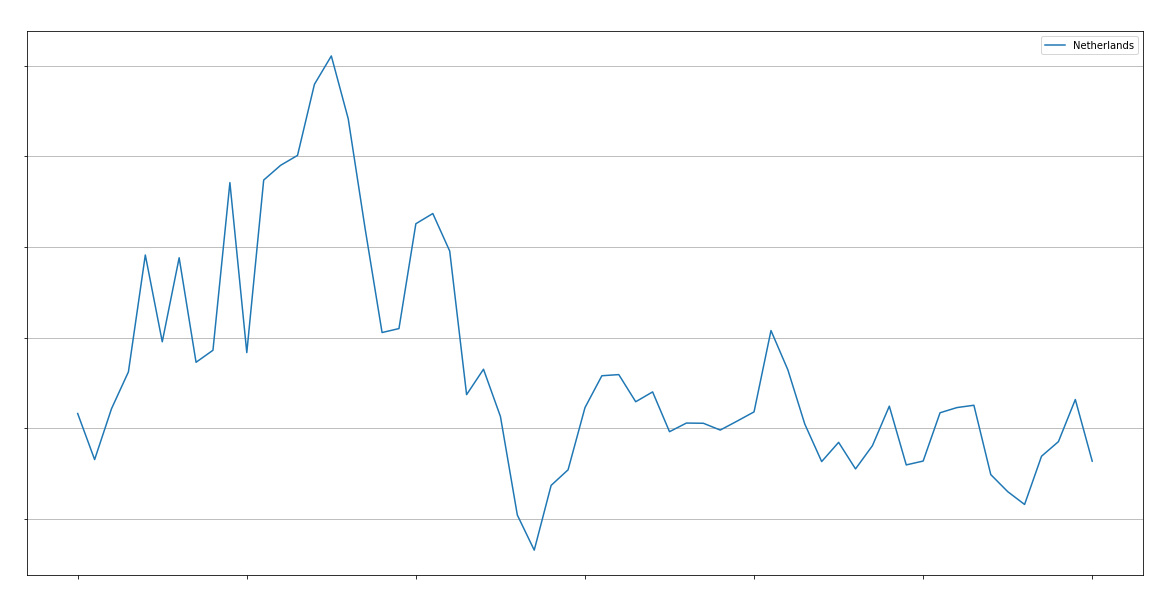

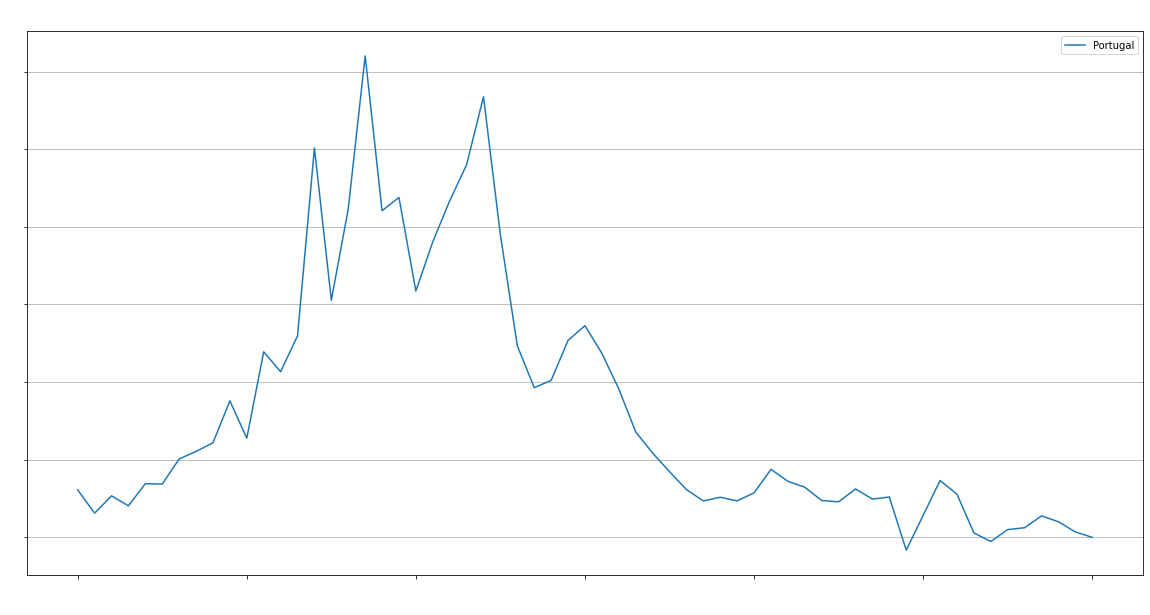

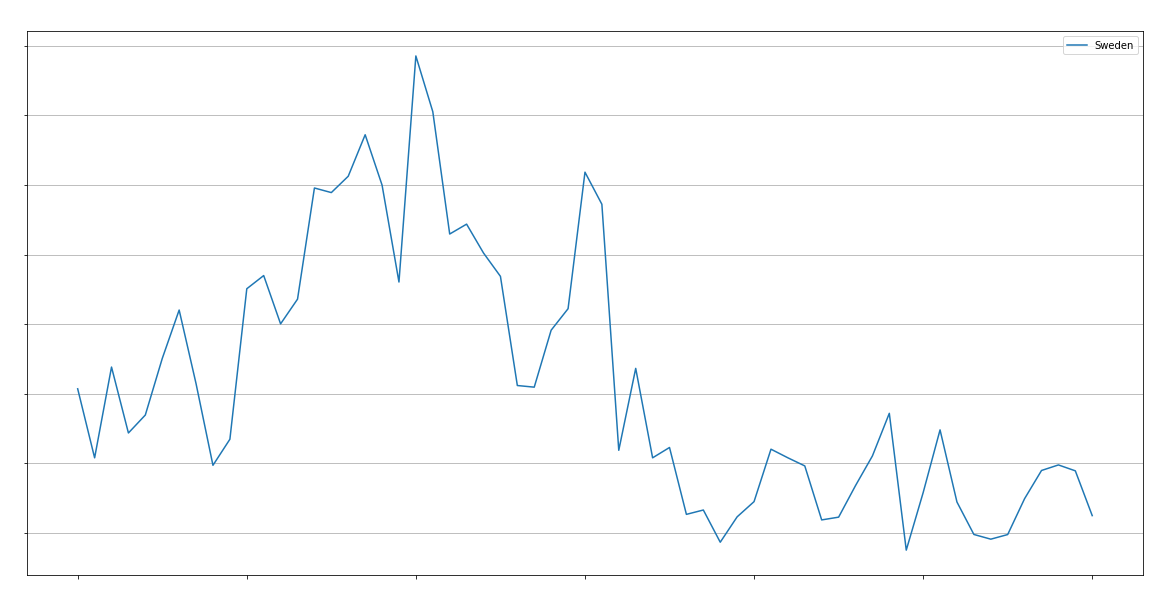

In [16]:
for col in infl_clr.columns:
    plt.plot(infl_clr[col],label=col)
    plt.xticks(color='w', rotation=50, size=10)
    plt.yticks(color='w', size=10)
    plt.title(col + ' '+'Inflation', color='w', size=25)
    plt.grid(axis='y')
    plt.legend()
    plt.show()

In [17]:
from scipy.stats import pearsonr
for col in infl_clr.columns:
    print(pearsonr(infl_clr['Greece'], infl_clr[col])[0], col)

0.5439818696229951 Austria
0.6127715256007302 Belgium
0.7863816675099362 Cyprus
0.5581213381278819 Germany
0.5936794575599565 Denmark
0.6750208995130517 Spain
0.599523753387196 Finland
0.6909531872249086 France
1.0 Greece
0.6269967873850812 Ireland
0.79690311415099 Italy
0.6048813563210692 Luxembourg
0.47463534861184115 Malta
0.3324526114838078 Netherlands
0.812323567700614 Portugal
0.7610813573286517 Sweden


In [18]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm

In [19]:
greece_contest = adfuller(infl_clr["Greece"], autolag="AIC", regression="nc")

print("1. ADF ", greece_contest[0])
print("1. P-value ", greece_contest[1])
print("1. Num of Lags ", greece_contest[2])
print("1. Num of observations used for ADF Regression and Critical values calculation ", greece_contest[3])
print("1. Critical values ", greece_contest[0])
for key, val in greece_contest[4].items():
    print("\t",key,": ",val)

1. ADF  -1.2204668638817093
1. P-value  0.20386645234967626
1. Num of Lags  0
1. Num of observations used for ADF Regression and Critical values calculation  60
1. Critical values  -1.2204668638817093
	 1% :  -2.604010833333333
	 5% :  -1.946266837962963
	 10% :  -1.6130297962962963


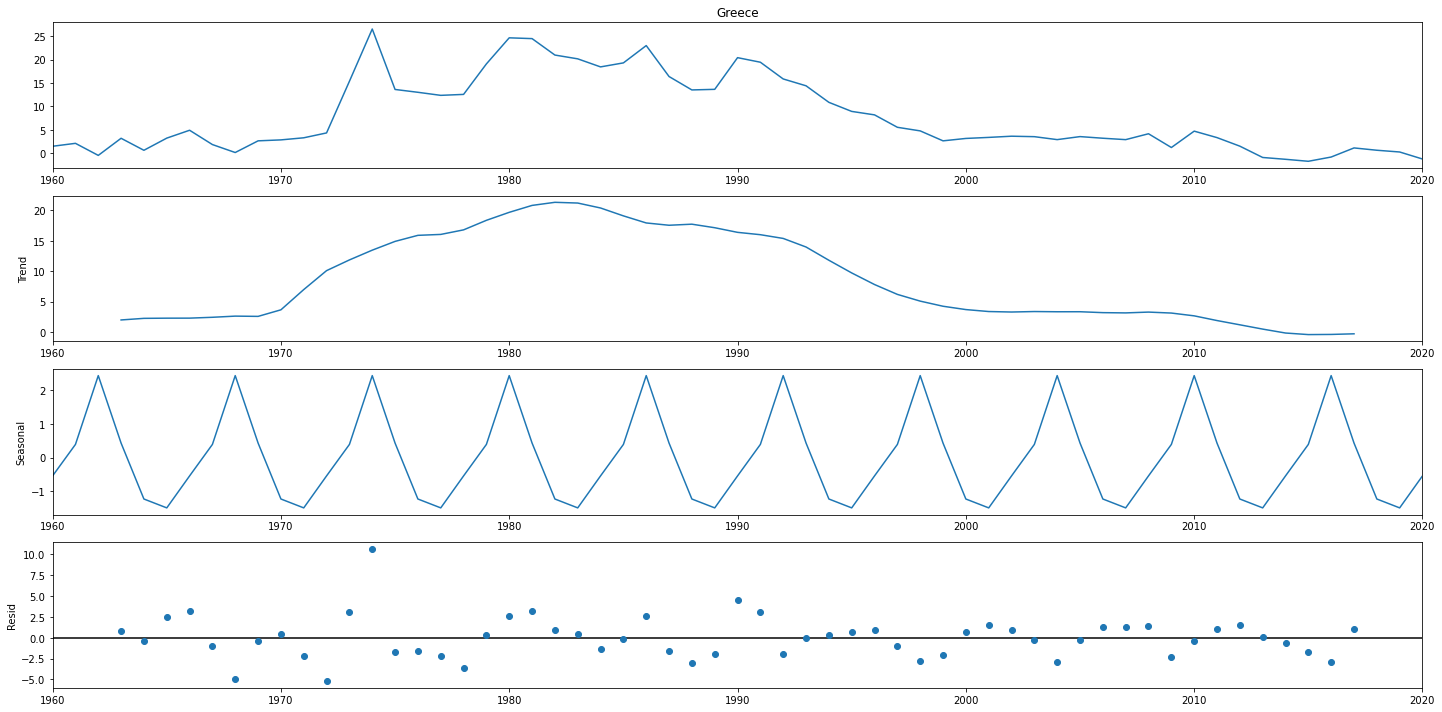

In [266]:
mul_res1 = sm.tsa.seasonal_decompose(infl_clr["Greece"],
                                     model="additive",
                                     period=6)

mul_fig1 =mul_res1.plot()


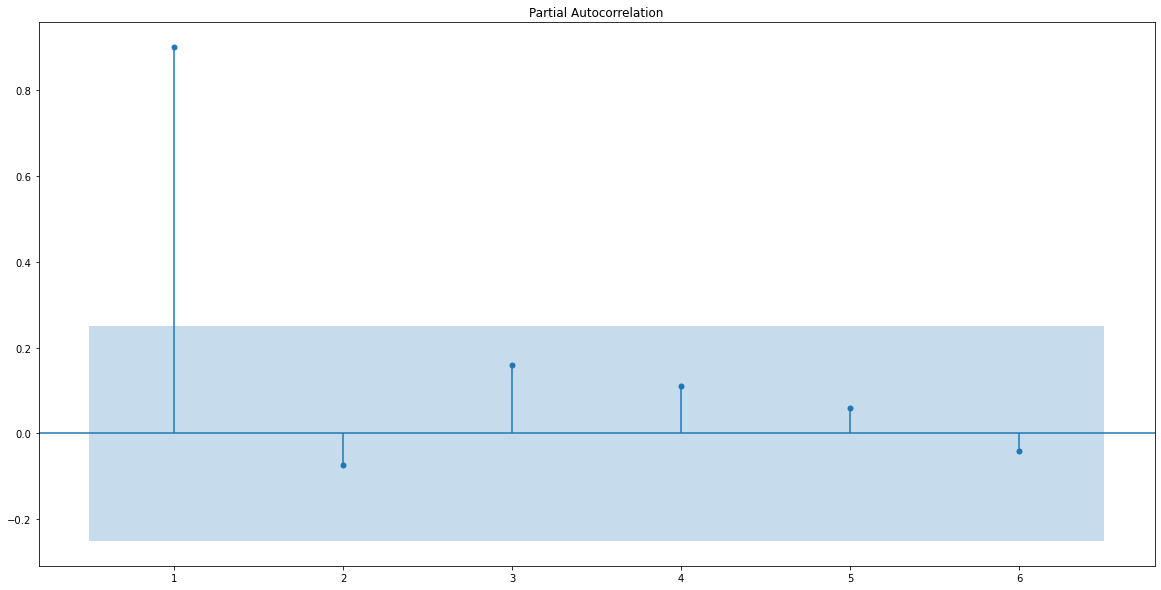

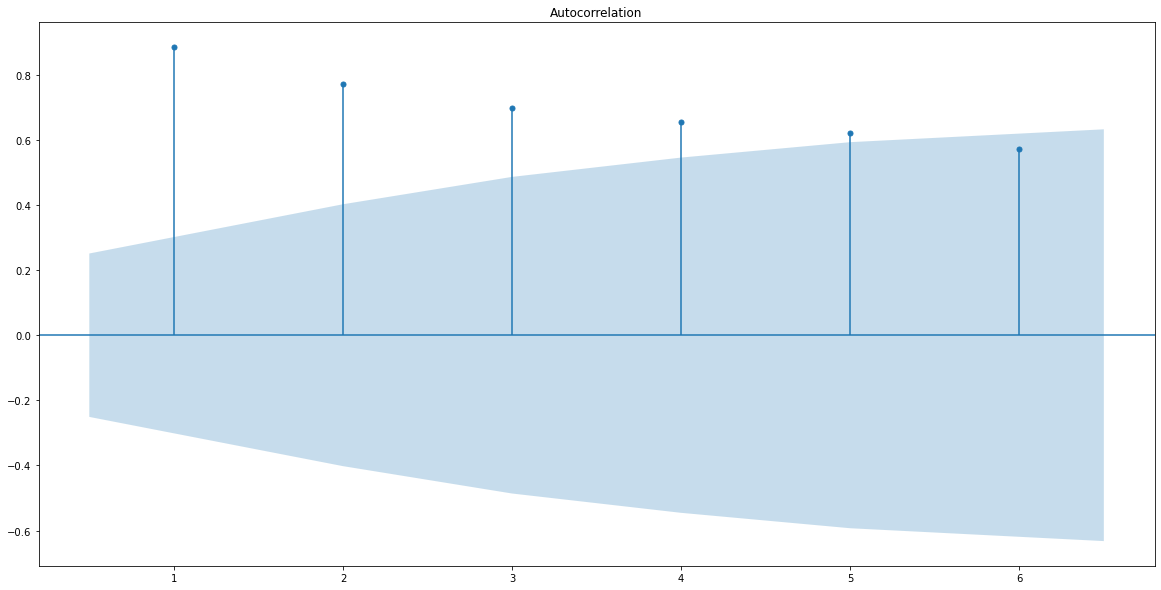

In [21]:
pacf = plot_pacf(infl_clr["Greece"], lags=6, zero=False)
acf = plot_acf(infl_clr["Greece"], lags=6, zero=False)

In [22]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(infl_clr["Greece"], test='adf')  # -> 0
n_adf

1

In [28]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sktime.forecasting.all import temporal_train_test_split, plot_series
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [24]:
y_train, y_test = temporal_train_test_split(infl_clr, test_size= 3)

y_train.shape, y_test.shape

((58, 16), (3, 16))

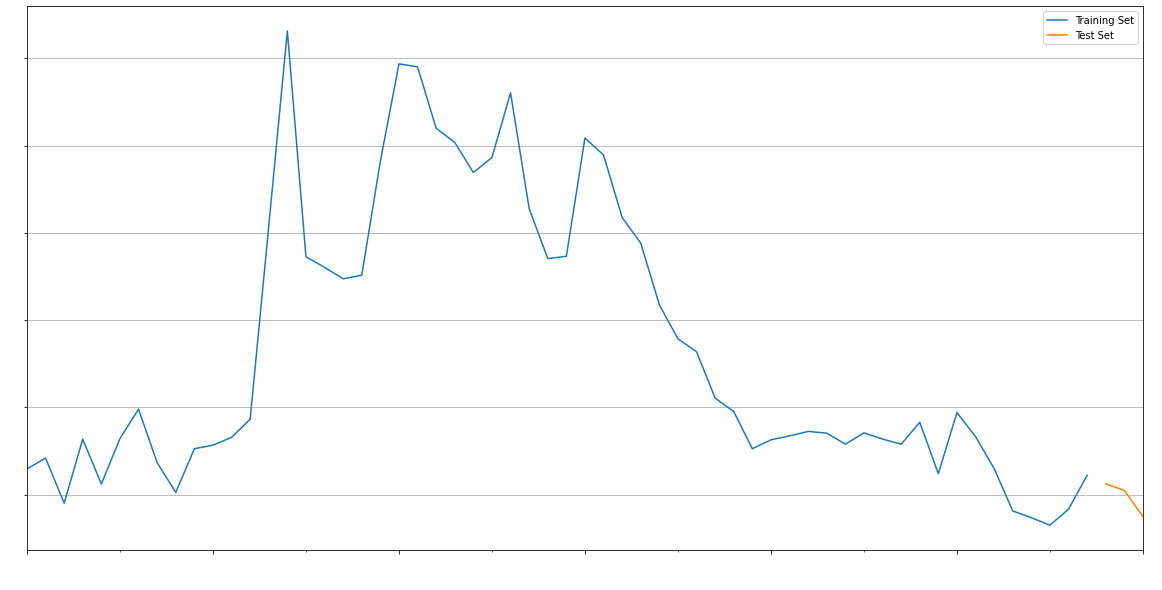

In [133]:
y_train["Greece"].plot(label= "Training Set")
y_test["Greece"].plot(label= "Test Set")
plt.xticks(color='w', rotation=50, size=10)
plt.yticks(color='w', size=10)
plt.grid(axis='y')
plt.legend()
plt.show()

In [154]:
wise_fit = auto_arima(np.asarray(y_train['Greece'], dtype=np.float64),
                      trace= True,
                      error_action='ignore',
                      m=5,
                      max_P=5,
                      max_Q=5,
                      suppress_warnings = True,
                      seasonal=True,
                      stationary=False,
                      exogenous = np.asarray(y_train[['Austria',
                                           'Belgium',
                                           'Cyprus',
                                           'Germany',
                                           'Denmark',
                                           'Spain',
                                           'Finland', 'France','Ireland', 'Italy', 'Luxembourg',
                                           'Malta', 'Netherlands', 'Portugal', 'Sweden']], dtype=np.float64))
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=290.994, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=308.582, Time=0.42 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=293.701, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=296.048, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=320.052, Time=0.11 sec
 ARIMA(2,0,2)(0,0,1)[5] intercept   : AIC=288.676, Time=0.79 sec
 ARIMA(2,0,2)(0,0,0)[5] intercept   : AIC=296.812, Time=0.57 sec
 ARIMA(2,0,2)(0,0,2)[5] intercept   : AIC=283.846, Time=1.09 sec
 ARIMA(2,0,2)(1,0,2)[5] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,2)(0,0,3)[5] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(2,0,2)(1,0,3)[5] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,0,2)(0,0,2)[5] intercept   : AIC=283.125, Time=1.11 sec
 ARIMA(1,0,2)(0,0,1)[5] intercept   : AIC=288.057, Time=0.78 sec
 ARIMA(1,0,2)(1,0,2)[5] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,0,2)(0,0,3)[5] intercept   : AIC=inf, Time=1.28 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   58
Model:             SARIMAX(1, 0, 3)x(0, 0, [1], 5)   Log Likelihood                -117.193
Date:                             Sat, 11 Sep 2021   AIC                            276.387
Time:                                     00:35:23   BIC                            319.656
Sample:                                          0   HQIC                           293.241
                                              - 58                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4495      0.520      0.865      0.387      -0.569       1.468
x2             1.1845      0.573      2.067      0.039       0.062       2.307
x3             1.0008      0.375      2.666      0.008       0.265       1.737
x4            -0.2714      0.366     -0.742      0.458      -0.988       0.445
x5             0.2163      0.375      0.577      0.564      -0.518       0.951
x6            -0.3671      0.227     -1.618      0.106      -0.812       0.078
x7            -0.3659      0.264     -1.387      0.166      -0.883       0.151
x8            -1.7104      0.573     -2.983      0.003      -2.834      -0.587
x9             0.2273      0.237      0.960      0.337      -0.237       0.691
x10            1.0152      0.356      2.855      0.004       0.318       1.712
x11           -0.5196      0.613     -0.848      0.397      -1.721       0.682
x12            0.1271      0.154      0.826      0.409      -0.174       0.429
x13            0.1771      0.372      0.476      0.634      -0.553       0.907
x14            0.0944      0.142      0.663      0.507      -0.185       0.373
x15           -0.0027      0.288     -0.009      0.993      -0.568       0.563
ar.L1          0.9167      0.062     14.790      0.000       0.795       1.038
ma.L1         -0.5287      0.692     -0.764      0.445      -1.885       0.827
ma.L2         -0.4583      0.521     -0.880      0.379      -1.479       0.562
ma.L3          0.9294      0.720      1.291      0.197      -0.481       2.340
ma.S.L5        0.4461      0.209      2.138      0.033       0.037       0.855
sigma2         2.7184      1.903      1.429      0.153      -1.010       6.447
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.25   Prob(JB):                         0.86
Heteroskedasticity (H):               0.36   Skew:                            -0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [155]:
model1 = SARIMAX(np.asarray(y_train['Greece'], dtype=np.float64),
                 order=(1,0,3),
                 seasonal_order=(0,0,1,5),
                 exog= np.asarray(y_train[["Spain", "Italy",'Cyprus','Portugal']], dtype=np.float64),
                 trend="t")
model1_fit=model1.fit(disp=False)
model1_fit.summary()

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   58
Model:             SARIMAX(1, 0, 3)x(0, 0, [1], 5)   Log Likelihood                -132.125
Date:                             Sat, 11 Sep 2021   AIC                            286.249
Time:                                     00:35:49   BIC                            308.914
Sample:                                          0   HQIC                           295.078
                                              - 58                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0054      0.022      0.252      0.801      -0.037       0.048
x1            -0.1198      0.140     -0.856      0.392      -0.394       0.154
x2             0.8095      0.207      3.907      0.000       0.403       1.216
x3             0.4707      0.252      1.870      0.062      -0.023       0.964
x4             0.0663      0.145      0.459      0.646      -0.217       0.350
ar.L1          0.8764      0.172      5.105      0.000       0.540       1.213
ma.L1         -0.0743      0.202     -0.368      0.713      -0.470       0.321
ma.L2         -0.2271      0.295     -0.769      0.442      -0.806       0.352
ma.L3         -0.0161      0.291     -0.055      0.956      -0.586       0.553
ma.S.L5        0.3617      0.241      1.501      0.133      -0.111       0.834
sigma2         5.3892      0.972      5.543      0.000       3.484       7.295
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
start = len(y_train)
end = len(y_train)+ len(y_test)-1
pred1 = model1_fit.predict(start=start,
                           end= end,
                           typ= "levels",
                           exog= np.asarray(y_test[["Spain", "Italy",'Cyprus','Portugal']], dtype=np.float64))
pred1_train = model1_fit.predict(start = 0,
                                end = len(y_train) - 1,
                                typ= "levels",
                                exog= np.asarray(y_test[["Spain", "Italy",'Cyprus','Portugal']], dtype=np.float64))
predictions = pd.DataFrame(pred1, columns=['predictions'], index=y_test.index)
predictions
predictions_train = pd.DataFrame(pred1_train, columns=['predictions_train'], index=y_train.index)

In [157]:
rmse = sqrt(mean_squared_error(y_test["Greece"], predictions['predictions']))

print("MSE:", mean_squared_error(y_test["Greece"], predictions['predictions']))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test["Greece"], predictions['predictions']))

MSE: 0.9521924909756274
RMSE: 0.9758035104341588
MAE: 0.9546935873482068


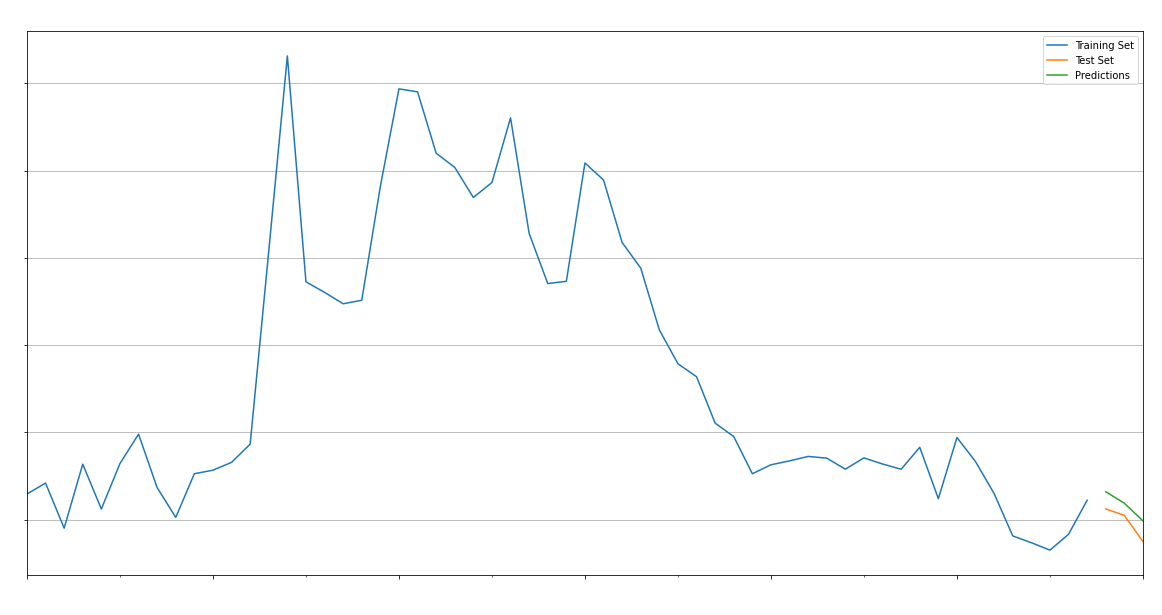

In [158]:
y_train["Greece"].plot(label= "Training Set")
y_test["Greece"].plot(label= "Test Set")
predictions['predictions'].plot(label= "Predictions")
plt.title("Plotting Preddictions of Greece inflation", fontsize=25, color='w')
plt.xticks(color='w', rotation=50, size=10)
plt.yticks(color='w', size=10)
plt.grid(axis='y')
plt.legend()
plt.show()

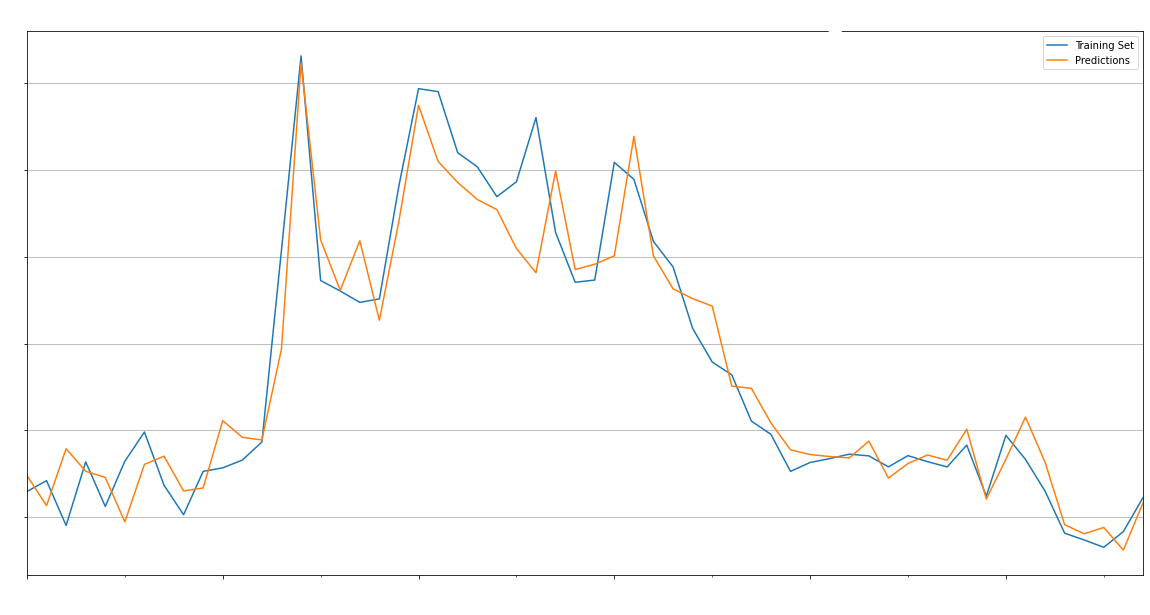

In [159]:
y_train["Greece"].plot(label= "Training Set")
predictions_train['predictions_train'].plot(label= "Predictions")
plt.title("Plotting Preddictions of training set of Greece inflation_analysis.ipynb", fontsize=25,color='w')
plt.xticks(color='w', rotation=50, size=10)
plt.yticks(color='w', size=10)
plt.grid(axis='y')
plt.legend()
plt.show()

In [161]:
model1_final = SARIMAX(np.asarray(infl_clr['Greece'], dtype=np.float64),
                 order=(1,0,3),
                 seasonal_order=(0,0,1,5),
                 exog= np.asarray(infl_clr[["Spain", "Italy",'Cyprus','Portugal']], dtype=np.float64),
                 trend="t")
model1_final_fit=model1.fit(disp=False)
model1_final_fit.summary()

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   58
Model:             SARIMAX(1, 0, 3)x(0, 0, [1], 5)   Log Likelihood                -132.125
Date:                             Sat, 11 Sep 2021   AIC                            286.249
Time:                                     00:42:12   BIC                            308.914
Sample:                                          0   HQIC                           295.078
                                              - 58                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0054      0.022      0.252      0.801      -0.037       0.048
x1            -0.1198      0.140     -0.856      0.392      -0.394       0.154
x2             0.8095      0.207      3.907      0.000       0.403       1.216
x3             0.4707      0.252      1.870      0.062      -0.023       0.964
x4             0.0663      0.145      0.459      0.646      -0.217       0.350
ar.L1          0.8764      0.172      5.105      0.000       0.540       1.213
ma.L1         -0.0743      0.202     -0.368      0.713      -0.470       0.321
ma.L2         -0.2271      0.295     -0.769      0.442      -0.806       0.352
ma.L3         -0.0161      0.291     -0.055      0.956      -0.586       0.553
ma.S.L5        0.3617      0.241      1.501      0.133      -0.111       0.834
sigma2         5.3892      0.972      5.543      0.000       3.484       7.295
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [220]:
start = len(y_train)+ len(y_test)
end = len(y_train)+ len(y_test)-1+ 3 
pred1_final = model1_final_fit.forecast(3,
#                                  start= start ,
#                                  end= end,
#                                  typ= "levels",
                                exog= np.asarray(y_test[["Spain", "Italy",'Cyprus','Portugal']], dtype=np.float64))

stamps = pd.date_range('2021-01-01', periods=3, freq='AS')
predictions_final = pd.DataFrame(pred1_final, columns=['predictions_final'], index=stamps)

In [223]:
predictions_final

,predictions_final
2021-01-01,1.607450
2022-01-01,0.947984
2023-01-01,-0.060698


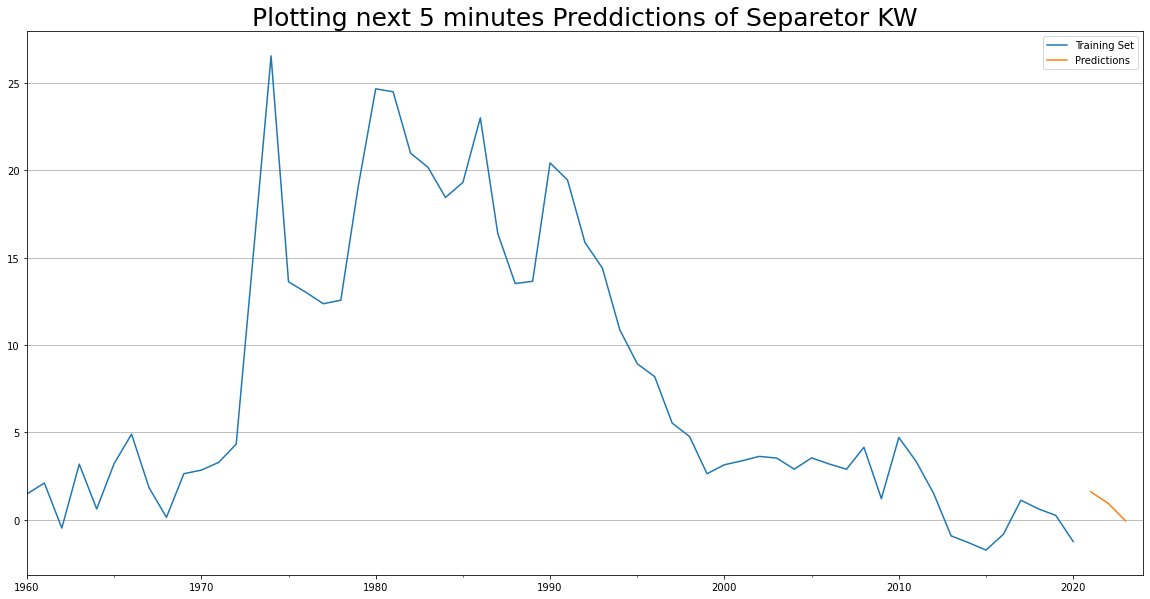

In [227]:
infl_clr["Greece"].plot(label= "Training Set")
predictions_final["predictions_final"].plot(label= "Predictions")
plt.title("Plotting next 5 minutes Preddictions of Separetor KW", fontsize=25)
plt.xlim("1960-01-01" , '2024-01-01	')
plt.grid(axis='y')
plt.legend()
plt.show()